# Time

In [54]:
#Source your data

#Wrangle your data

#Exploratory Data Analysis

#Trends and seasonality in time series data

#Identifying Trends

#Seasonal patterns

#First Order Differencing

#Periodicity and Autocorrelation

In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os
os.chdir('C:/Users/saravana.ayyappa/Desktop/Machine Learning')

In [4]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [6]:
df.columns

Index(['Month', 'diet: (Worldwide)', 'gym: (Worldwide)',
       'finance: (Worldwide)'],
      dtype='object')

In [11]:
df['Month'] = pd.to_datetime(df['Month'])

In [13]:
df.set_index('Month', inplace=True)
df.head()

,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


# EDA

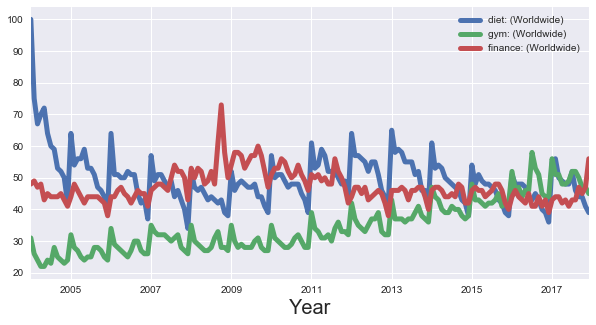

In [16]:
df.plot(figsize=(10,5), linewidth=5, fontsize=10)
plt.xlabel('Year', fontsize=20);

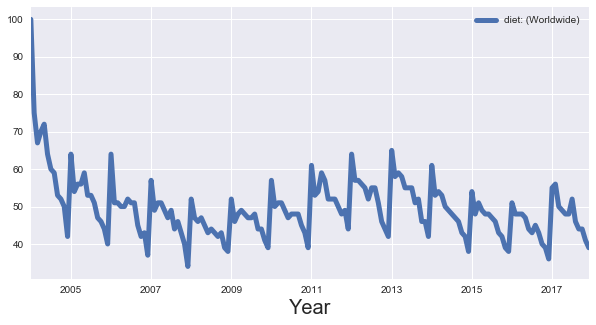

In [20]:
df[['diet: (Worldwide)']].plot(figsize=(10,5), linewidth=5, fontsize=10)
plt.xlabel('Year', fontsize=20);

# Trends and Seasonality in Time Series

In [22]:
# Rolling Average

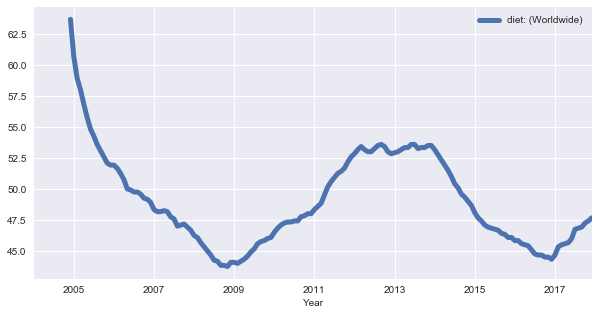

In [21]:
diet = df[['diet: (Worldwide)']]
diet.rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=10)
plt.xlabel('Year', fontsize=10);

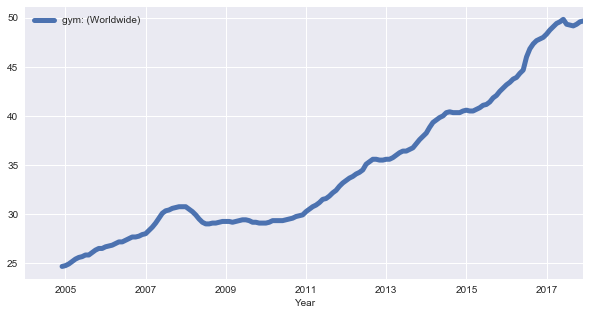

In [23]:
gym = df[['gym: (Worldwide)']]
gym.rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=10)
plt.xlabel('Year', fontsize=10);

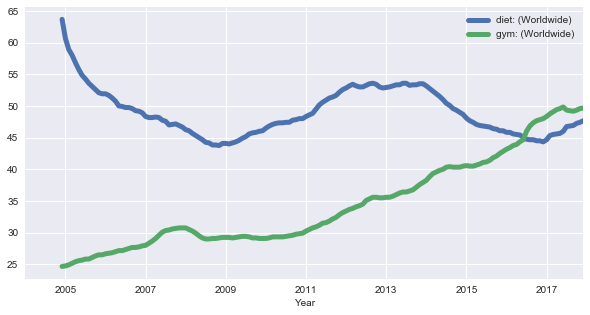

In [24]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(10,5), linewidth=5, fontsize=10)
plt.xlabel('Year', fontsize=10);

In [26]:
# Differencing is a must in turning your time series into a stationary time series.

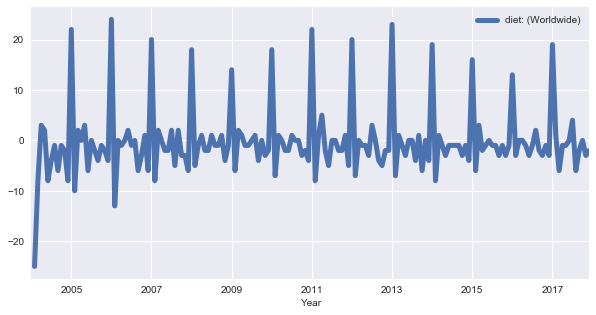

In [25]:
diet.diff().plot(figsize=(10,5), linewidth=5, fontsize=10)
plt.xlabel('Year', fontsize=10);

# Periodicity and Autocorrelation

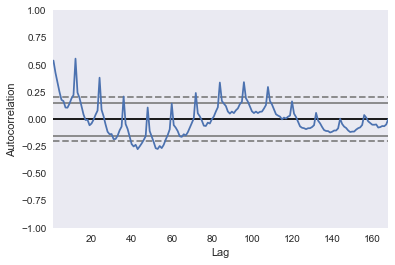

In [27]:
pd.plotting.autocorrelation_plot(diet)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


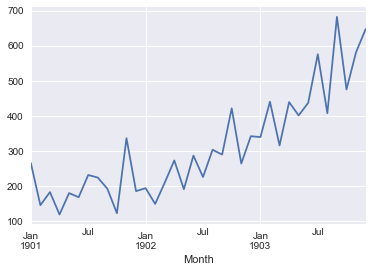

In [38]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.txt', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 17 Sep 2019   AIC                            406.340
Time:                        18:06:54   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

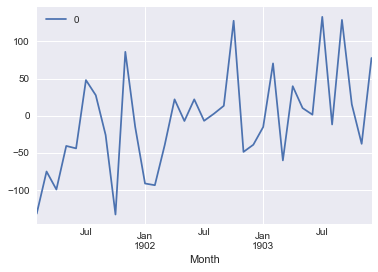

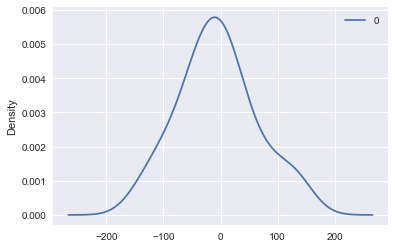

                0
count   35.000000
mean    -5.495255
std     68.132879
min   -133.296622
25%    -42.477941
50%     -7.186679
75%     24.748316
max    133.237969


In [39]:
# fit model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=349.117669, expected=342.300000
predicted=306.513043, expected=339.700000
predicted=387.376446, expected=440.400000
predicted=348.154204, expected=315.900000
predicted=386.308817, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379537, expected=437.400000
predicted=394.737322, expected=575.500000
predicted=434.915580, expected=407.600000
predicted=507.923415, expected=682.000000
predicted=435.482839, expected=475.300000
predicted=652.743683, expected=581.300000
predicted=546.343580, expected=646.900000
Test MSE: 6958.322


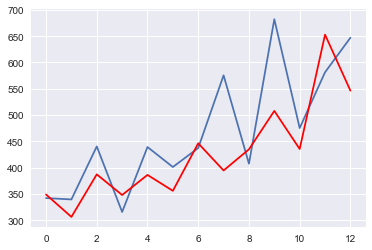

In [44]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [51]:
# evaluate an ARIMA model for a given order (p,d,q)
import warnings
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [52]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.217
ARIMA(0, 0, 2) MSE=23989.597
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.206
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.029
ARIMA(1, 0, 0) MSE=23112.933
ARIMA(1, 1, 0) MSE=7121.365
ARIMA(1, 1, 1) MSE=7003.687
ARIMA(1, 2, 0) MSE=18608.045
ARIMA(2, 0, 0) MSE=10176.546
ARIMA(2, 1, 0) MSE=5689.929
ARIMA(2, 1, 1) MSE=7759.710
ARIMA(2, 2, 0) MSE=9860.932
ARIMA(4, 1, 0) MSE=6649.595
ARIMA(4, 1, 1) MSE=6796.265
ARIMA(4, 2, 0) MSE=7596.333
ARIMA(4, 2, 1) MSE=4694.870
ARIMA(6, 1, 0) MSE=6810.076
ARIMA(6, 1, 1) MSE=4359.601
ARIMA(6, 2, 0) MSE=6261.187
ARIMA(8, 1, 0) MSE=6579.247
Best ARIMA(6, 1, 1) MSE=4359.601
